In [2]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt

from IPython.display import HTML, display # Para graficar tablas
import tabulate

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


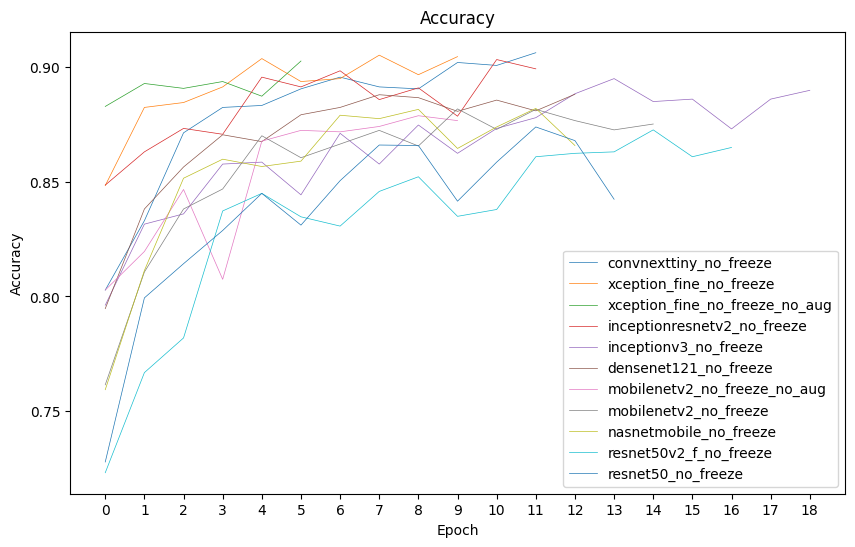

66366570


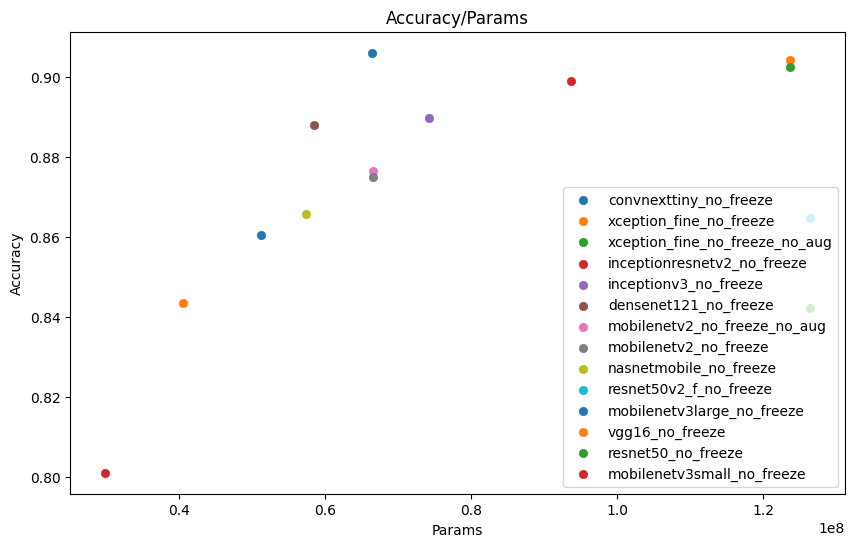

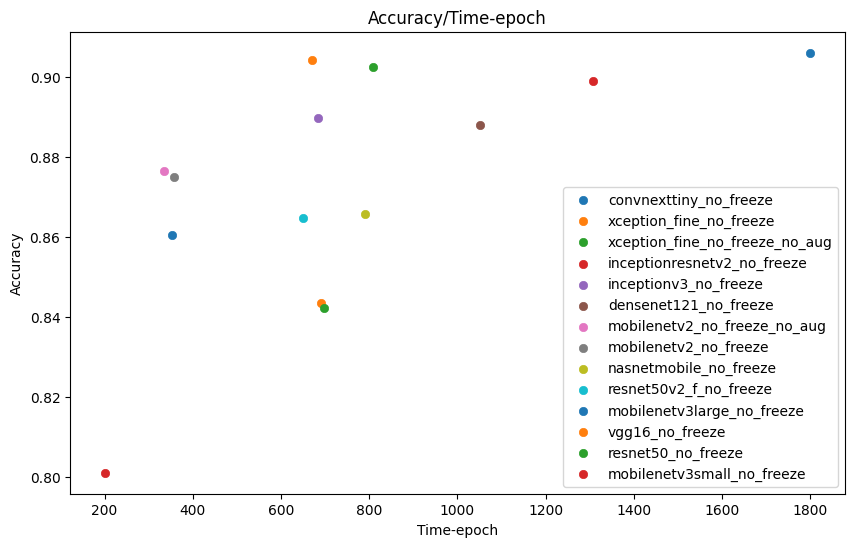

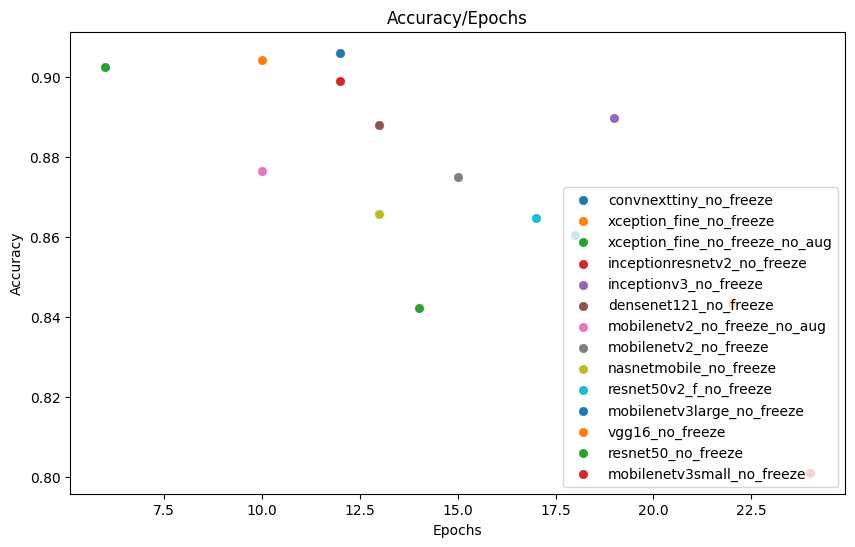

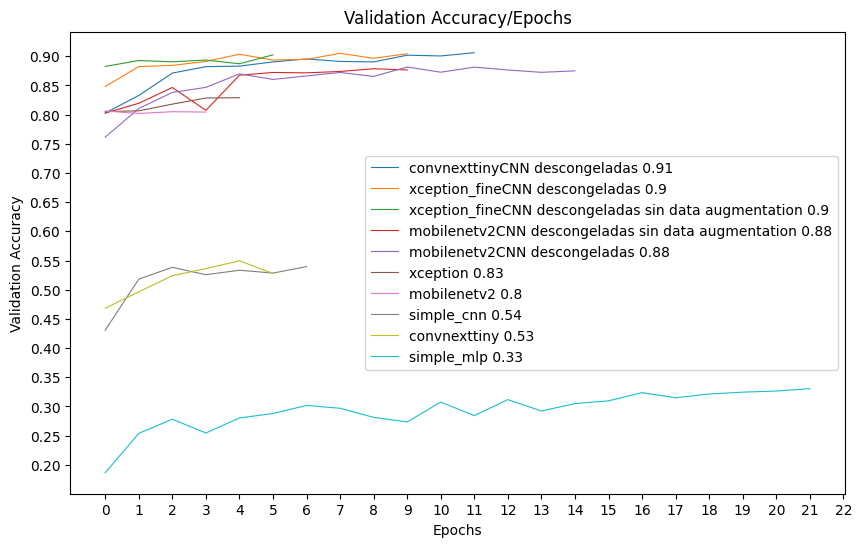

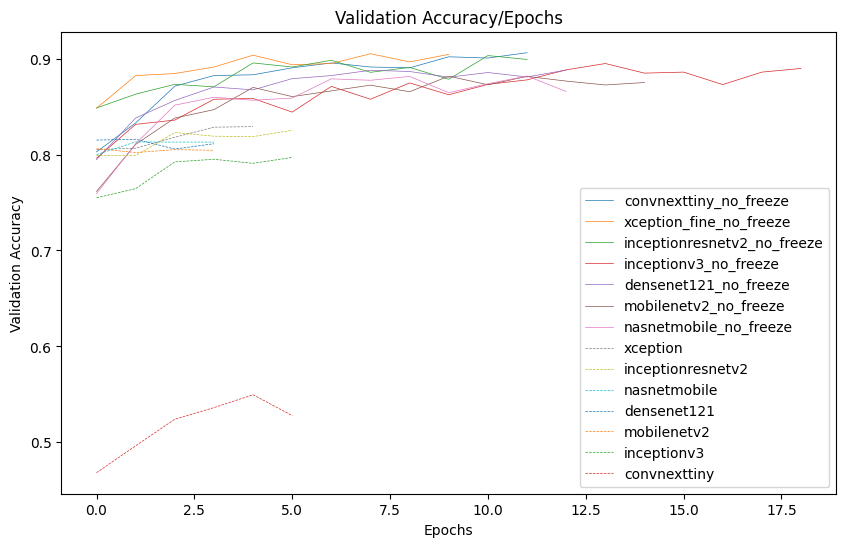

Model,Train accuracy,Train loss,Val accuracy,Val loss,Params,Epochs,Time/Epoch,Time
convnexttiny_no_freeze,0.57,1.17,0.91,0.36,66.37M,12,1799.02,21588.27
xception_fine_no_freeze,0.62,1.07,0.90,0.36,123.63M,10,670.20,6702.02
xception_fine_no_freeze_no_aug,0.99,0.02,0.90,0.53,123.63M,6,808.19,4849.13
inceptionresnetv2_no_freeze,0.65,0.98,0.90,0.39,93.67M,12,1306.87,15682.44
inceptionv3_no_freeze,0.56,1.20,0.89,0.42,74.24M,19,684.87,13012.54
densenet121_no_freeze,0.55,1.22,0.89,0.42,58.43M,13,1050.03,13650.33
mobilenetv2_no_freeze_no_aug,1.00,0.02,0.88,0.70,66.49M,10,335.72,3357.20
mobilenetv2_no_freeze,0.58,1.15,0.88,0.44,66.49M,15,358.09,5371.32
nasnetmobile_no_freeze,0.60,1.10,0.87,0.54,57.27M,13,789.63,10265.25
resnet50v2_f_no_freeze,0.55,1.22,0.86,0.54,126.34M,17,649.03,11033.57


In [9]:
DIR_MODELS = 'Models'

# Read the history of the model

historys = []

for file in os.listdir(DIR_MODELS):
    if file.endswith(".json"):
        with open(os.path.join(DIR_MODELS, file), 'r') as f:
            historys.append(json.load(f))

# Plot the history of the model, x axis 1 to 25 epochs

# Order historys by accuracy
historys.sort(key=lambda x: x['history']['val_accuracy'][-1], reverse=True)

print(historys[0]['history'].keys())

plt.figure(figsize=(10, 6))
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 26, 1.0))
plt.yticks(np.arange(0, 1.1, 0.05))
for history in historys:
    # thickness line = 1
    if 'no_freeze' not in history['name']: continue 
    if history['history']['val_accuracy'][-1] < 0.7: continue
    if history['history']['val_accuracy'][0]  < 0.7: continue
    plt.plot(history['history']['val_accuracy'], label=history['name'], linewidth=0.5)
plt.legend(loc='lower right')

plt.show()

# Grafica accuracy/params

print(historys[0]['params'])

plt.figure(figsize=(10, 6))
plt.title('Accuracy/Params')
plt.xlabel('Params')
plt.ylabel('Accuracy')
for history in historys:
    # thickness line = 1
    if 'no_freeze' not in history['name']: continue
    if history['history']['val_accuracy'][-1] < 0.7: continue
    plt.scatter(history['params'], history['history']['val_accuracy'][-1], label=history['name'], linewidth=0.5)
plt.legend(loc='lower right')

plt.show()

# Grafica accuracy/time-epoch

plt.figure(figsize=(10, 6))
plt.title('Accuracy/Time-epoch')
plt.xlabel('Time-epoch')
plt.ylabel('Accuracy')
for history in historys:
    # thickness line = 1
    if 'no_freeze' not in history['name']: continue
    if history['history']['val_accuracy'][-1] < 0.7: continue
    plt.scatter(history['time']/len(history['history']['val_accuracy']), history['history']['val_accuracy'][-1], label=history['name'], linewidth=0.5)

plt.legend(loc='lower right')

plt.show()

# Grafica accuracy/epochs

plt.figure(figsize=(10, 6))
plt.title('Accuracy/Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
for history in historys:
    # thickness line = 1
    if 'no_freeze' not in history['name']: continue
    if history['history']['val_accuracy'][-1] < 0.7: continue
    plt.scatter(len(history['history']['val_accuracy']), history['history']['val_accuracy'][-1], label=history['name'], linewidth=0.5)

plt.legend(loc='lower right')

plt.show()

texto_lista = ['convnexttiny_no_freeze', 'convnexttiny', 'xception_fine_no_freeze_no_aug', 'xception_fine_no_freeze', 'xception', 'mobilenetv2_no_freeze_no_aug', 'mobilenetv2_no_freeze', 'mobilenetv2', 'simple_cnn', 'simple_mlp']

# Show all the models in the list, add acc text in legend order by acc

plt.figure(figsize=(10, 6))
plt.title('Validation Accuracy/Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.xticks(np.arange(0, 26, 1.0))
plt.yticks(np.arange(0, 1.1, 0.05))

for history in historys:
    if history['name'] not in texto_lista: continue
    name = history['name'].replace('_no_freeze', 'CNN descongeladas').replace('_no_aug', ' sin data augmentation')
    # Limit decimals to 2
    plt.plot(history['history']['val_accuracy'], label=name + ' ' + str(round(history['history']['val_accuracy'][-1], 2)), linewidth=0.8)

plt.legend(loc='center right')

plt.show()

# Make a table with the results, Time to train, Accuracy and Loss, params, epochs, time/epoch
# order by accuracy, show two decimals

table = []

for history in historys:
    # Show params in millions notation
    params = str(round(history['params'] / 1000000, 2)) + 'M'
    table.append([history['name'], history['history']['accuracy'][-1], history['history']['loss'][-1], history['history']['val_accuracy'][-1], history['history']['val_loss'][-1], params, len(history['history']['val_accuracy']), history['time']/len(history['history']['val_accuracy']), history['time']])

table.sort(key=lambda x: x[3], reverse=True)

plt.figure(figsize=(10, 6))
plt.title('Validation Accuracy/Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
new = []
for history in historys:
    # thickness line = 1
    if 'no_freeze' not in history['name']: continue
    if history['history']['val_accuracy'][0] < 0.75: continue
    if 'no_aug' in history['name']: continue
    plt.plot(history['history']['val_accuracy'], label=history['name'], linewidth=0.5)
    new.append(history['name'])

for history in historys:
    # thickness line = 1
    #if history['name'] not in new: continue
    if 'no_freeze' in history['name']:
        continue
    exist = False
    for elm in new:
        if history['name'] in elm:
            exist = True
            break
    if not exist: continue
    # Change the line style    
    plt.plot(history['history']['val_accuracy'], label=history['name'], linewidth=0.5, linestyle='dashed')


plt.legend(loc='lower right')

plt.show()

# Show the table, two decimals

display(HTML(tabulate.tabulate(table, headers=['Model', 'Train accuracy', 'Train loss', 'Val accuracy', 'Val loss', 'Params', 'Epochs', 'Time/Epoch', 'Time'], tablefmt='html', floatfmt=".2f")))
